# Problem Session 6
## Forecasting The Bachelorette and Pumpkin Spice I

In the first of two time series based problem sessions you will focus on some of the basics of time series forecasting. In particular, you will do some exploratory data analysis, test your understanding of data split adjustments and build baseline models for two time series.

The problems in this notebook will cover the content covered in our `Time Series Forecasting` lectures including:
- `What are Time Series and Forecasting`,
- `Adjustments for Time Series Data`,
- `Time and Dates in Python` and
- `Baseline Forecasts`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

sns.set_style("whitegrid")

#### 1. <a href="https://www.imdb.com/title/tt0348894/">The Bachelorette</a>

The first data set you will work with is the IMDB ratings of every episode of the Bachelorette (as of May 2, 2023). This data was pulled with the `Cinemagoer` python IMDB API wrapper. 

##### a.

Load `the_bachelorette.csv` from the `data` folder, look at the first five observations.

##### Sample Solution

In [2]:
tv = pd.read_csv("../data/the_bachelorette.csv")

In [3]:
tv.head()

,episode_number,title,season,season_episode_number,imdb_rating
0,1,Episode #1.1,1,1,6.201235
1,2,Episode #1.2,1,2,6.201235
2,3,Episode #1.3,1,3,5.301235
3,4,Episode #1.4,1,4,5.801235
4,5,Episode #1.5,1,5,5.801235


Here are descriptions for the columns of this data set:
- `episode_number` is the number of the episode with respect to the entire series run,
- `title` is the title of the episode,
- `season` is the number of the season in which the episode aired,
- `season_episode_number` is the number of the episode with respect to the season in which it aired,
- `imdb_rating` is the average rating of the episode among IMDB's users.

##### b. 

Our goal will be to predict how good the next episode of the Bachelorette is, that means we want a forecast horizon of $1$ episode. Make a train test split that sets aside the last three episodes as a test set.

##### Sample Solution

In [4]:
tv_train = tv.iloc[:-3].copy()
tv_test = tv.drop(tv_train.index).copy()

##### c. 

Plot the IMDB rating for each episode using the training data.

Does this time series seem to exhibit a trend? Does this time series seem to exhibit seasonality? If it exhibits either do your best to describe what you see.

##### Sample Solution

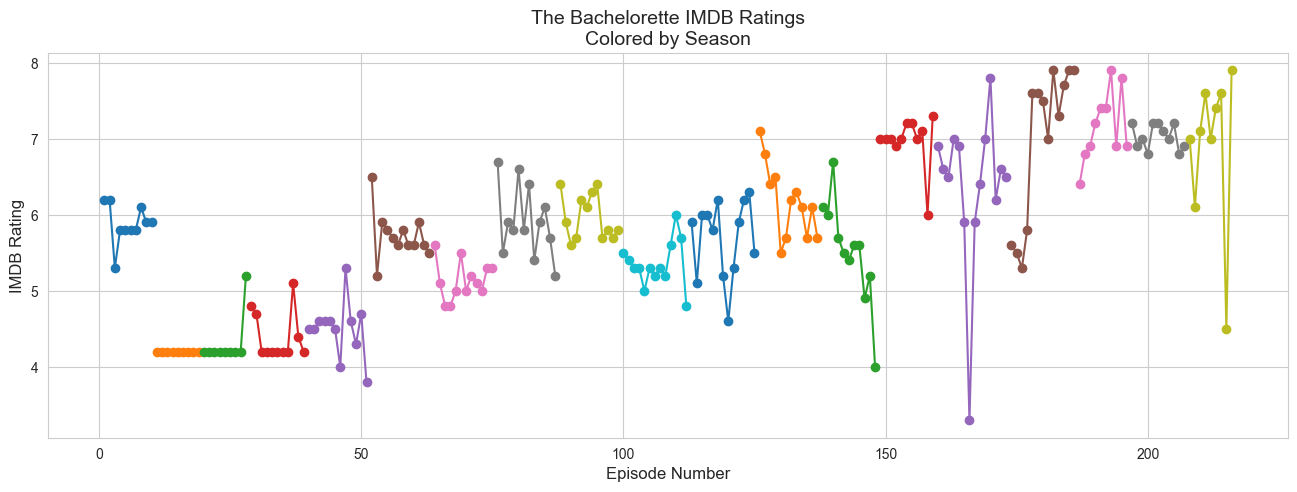

In [5]:
plt.figure(figsize=(16,5))

for season in range(1, tv_train.season.max()+1):
    plt.plot(tv_train.loc[tv_train.season==season].episode_number,
                tv_train.loc[tv_train.season==season].imdb_rating,
                '-o')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Episode Number", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)

plt.title("The Bachelorette IMDB Ratings\nColored by Season", fontsize=14)
    
plt.show()

From this plot it does not appear that the data experiences seasonality. However, there does seem to be an upward trend over the run of the show.

##### d.

Choose a baseline model that you could build on these data. Plot the forecast from this baseline along with the training data, do not plot the test data.

Recall that we learned about the following baseline models for non-seasonal data:
- The average forecast
- The naive forecast
- The trend forecast and
- The random walk with drift.

##### Sample Solution

##### The average forecast

In [6]:
train_avg = tv_train.imdb_rating.mean()

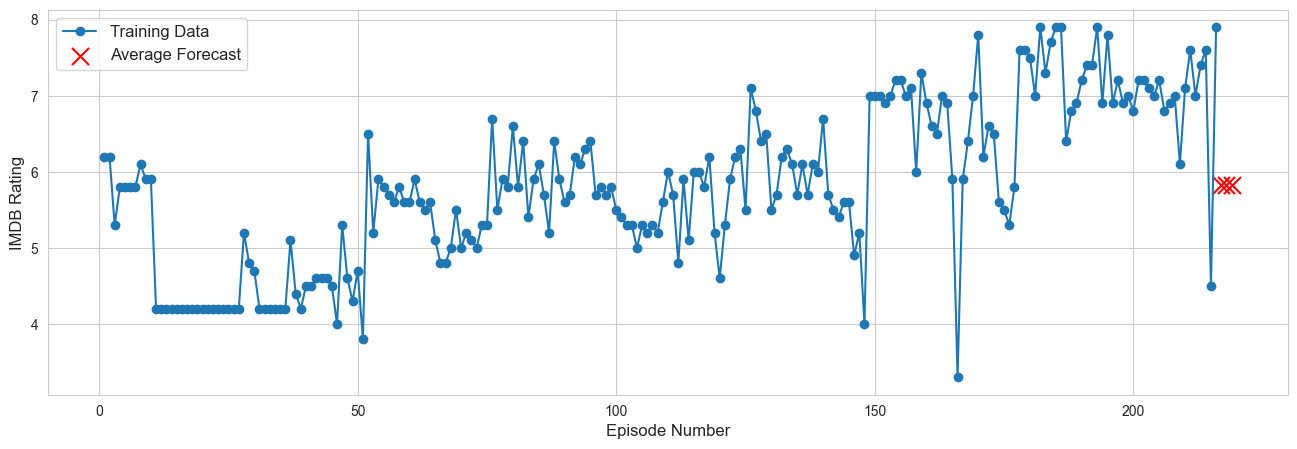

In [7]:
plt.figure(figsize=(16,5))

plt.plot(tv_train.episode_number,
            tv_train.imdb_rating,
            '-o',
            label = "Training Data")

plt.scatter(range(tv_train.episode_number.max() + 1,
                  tv_train.episode_number.max() + 4),
            train_avg*np.ones(3),
            marker='x',
            s=150,
            color='red',
            label="Average Forecast")

plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Episode Number", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)

    
plt.show()

##### The naive forecast

In [8]:
naive = tv_train.imdb_rating.values[-1]

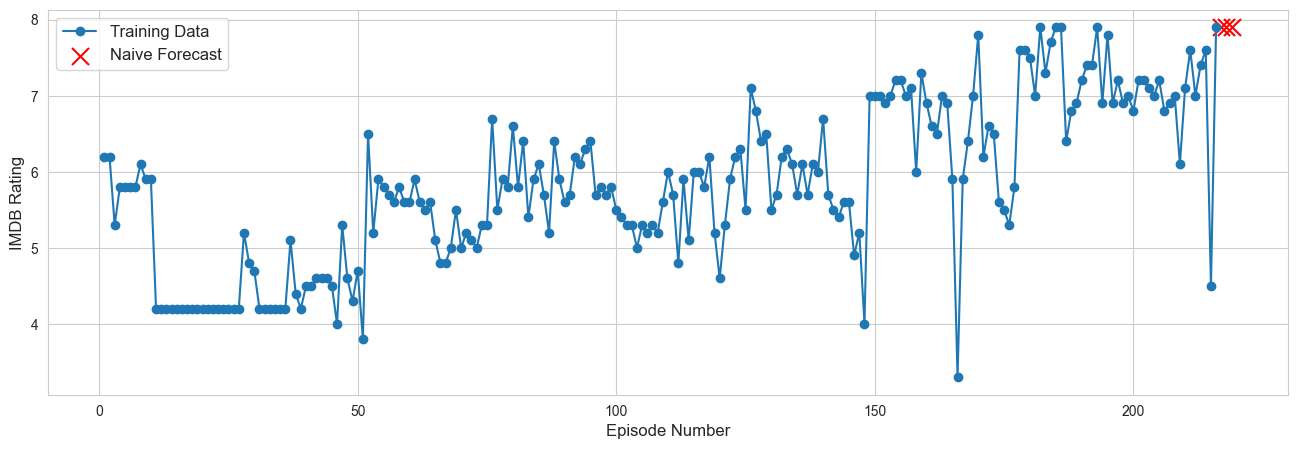

In [9]:
plt.figure(figsize=(16,5))

plt.plot(tv_train.episode_number,
            tv_train.imdb_rating,
            '-o',
            label = "Training Data")

plt.scatter(range(tv_train.episode_number.max() + 1,
                  tv_train.episode_number.max() + 4),
            naive*np.ones(3),
            marker='x',
            s=150,
            color='red',
            label="Naive Forecast")

plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Episode Number", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)

    
plt.show()

##### The trend forecast

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
slr = LinearRegression()

slr.fit(tv_train.episode_number.values.reshape(-1,1), 
        tv_train.imdb_rating.values)

LinearRegression()

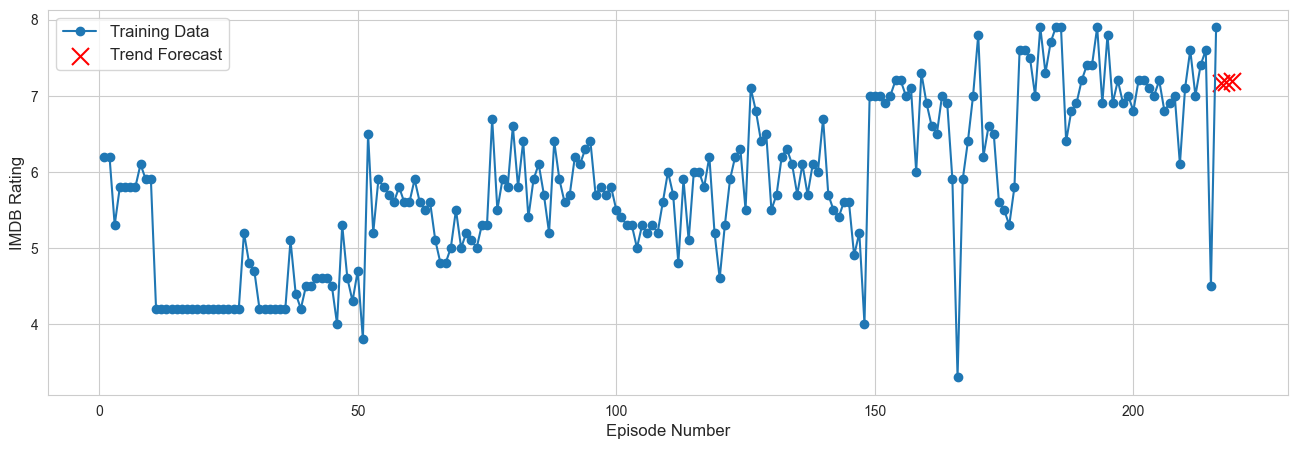

In [12]:
plt.figure(figsize=(16,5))

plt.plot(tv_train.episode_number,
            tv_train.imdb_rating,
            '-o',
            label = "Training Data")

plt.scatter(range(tv_train.episode_number.max() + 1,
                  tv_train.episode_number.max() + 4),
            slr.predict(np.arange(tv_train.episode_number.max() + 1,
                                  tv_train.episode_number.max() + 4).reshape(-1,1)),
            marker='x',
            s=150,
            color='red',
            label="Trend Forecast")

plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Episode Number", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)

    
plt.show()

##### Random walk with drift forecast

In [13]:
beta_hat = tv_train.imdb_rating.diff()[1:].mean()

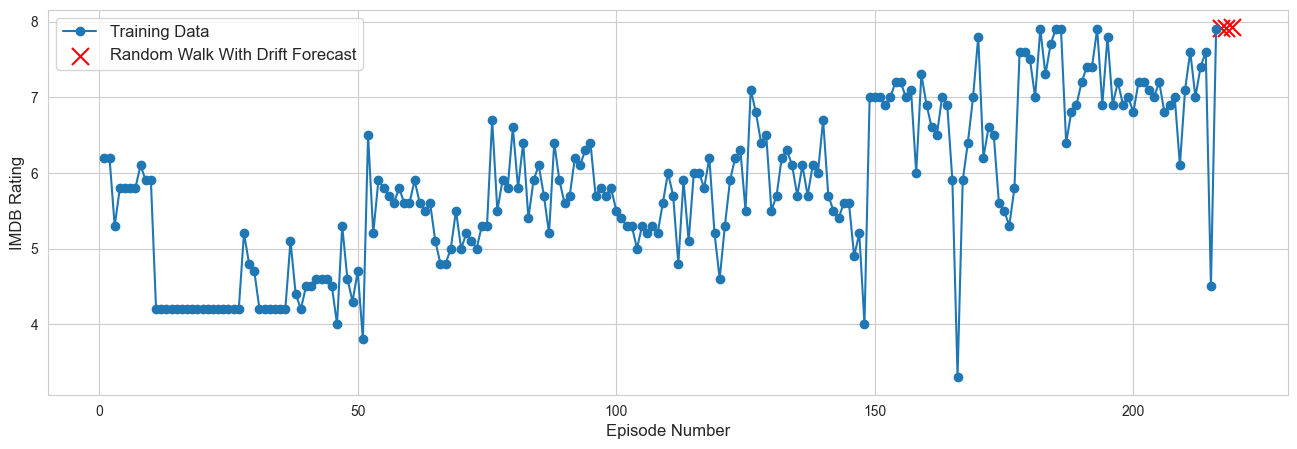

In [14]:
plt.figure(figsize=(16,5))

plt.plot(tv_train.episode_number,
            tv_train.imdb_rating,
            '-o',
            label = "Training Data")

plt.scatter(range(tv_train.episode_number.max() + 1,
                  tv_train.episode_number.max() + 4),
            tv_train.imdb_rating.values[-1] + beta_hat*np.array([1,2,3]),
            marker='x',
            s=150,
            color='red',
            label="Random Walk With Drift Forecast")

plt.legend(fontsize=12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Episode Number", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)

    
plt.show()

##### e.

Calculate the average cross-validation root mean squared error for your baseline model. 

Set up this cross-validation so that there are ten splits and each holdout set only has three observations in it.

##### Sample Solution

I'll answer this for all the baselines I presented above.

In [15]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [16]:
cv = TimeSeriesSplit(10, 
                     test_size=3)

##### Average Model

In [17]:
avg_rmses = np.zeros(10)

i = 0
for train_index, test_index in cv.split(tv_train):
    tv_tt = tv_train.loc[train_index]
    tv_ho = tv_train.loc[test_index]
    
    tt_avg = tv_tt.imdb_rating.mean()
    
    avg_rmses[i] = np.sqrt(mean_squared_error(tv_ho.imdb_rating.values,
                                    tt_avg*np.ones(3)))
    
    i = i + 1

In [18]:
np.mean(avg_rmses)

1.429883233159107

##### Naive model

In [19]:
naive_rmses = np.zeros(10)

i = 0
for train_index, test_index in cv.split(tv_train):
    tv_tt = tv_train.loc[train_index]
    tv_ho = tv_train.loc[test_index]
    
    tt_naive = tv_tt.imdb_rating.values[-1]
    
    naive_rmses[i] = np.sqrt(mean_squared_error(tv_ho.imdb_rating.values,
                                    tt_naive*np.ones(3)))
    
    i = i + 1

In [20]:
np.mean(naive_rmses)

0.5962082745150036

##### Trend model

In [21]:
trend_rmses = np.zeros(10)

i = 0
for train_index, test_index in cv.split(tv_train):
    tv_tt = tv_train.loc[train_index]
    tv_ho = tv_train.loc[test_index]
    
    slr = LinearRegression()
    
    slr.fit(tv_tt.episode_number.values.reshape(-1,1),
               tv_tt.imdb_rating)
    
    pred = slr.predict(tv_ho.episode_number.values.reshape(-1,1))
    
    trend_rmses[i] = np.sqrt(mean_squared_error(tv_ho.imdb_rating.values,
                                        pred))
    
    i = i + 1

In [22]:
np.mean(trend_rmses)

0.47290205472258784

##### Random walk with drift

In [23]:
walk_rmses = np.zeros(10)

i = 0
for train_index, test_index in cv.split(tv_train):
    tv_tt = tv_train.loc[train_index]
    tv_ho = tv_train.loc[test_index]
    
    beta_hat = tv_tt.imdb_rating.diff().mean()
    
    pred = tv_tt.imdb_rating.values[-1] + beta_hat*np.array([1,2,3])
    
    walk_rmses[i] = np.sqrt(mean_squared_error(tv_ho.imdb_rating.values,
                                        pred))
    
    i = i + 1

In [24]:
np.mean(walk_rmses)

0.5995732550265304

We will return to these baseline performances in `Problem Session 7`.

#### 2. Pumpkin spice interest

The second data set you will work with in this problem session is a time series collected using <a href="https://trends.google.com/trends/?geo=US">Google Trends</a>. This data set contains the Google Trends interest level in the United States for the search term "pumkin spice" since 2004.

##### a.

Load the data stored in `pumpkin_spice.csv` in the `Data` folder then look at the first five rows.

You may want to turn the `Month` column into a `datetime` using the `parse_dates` argument of `read_csv`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html</a>.

##### Sample Solution

In [25]:
pumpkin = pd.read_csv("../data/pumpkin_spice.csv",
                         parse_dates = ["Month"])

In [26]:
pumpkin.head()

,Month,interest_level
0,2004-01-01,0
1,2004-02-01,0
2,2004-03-01,0
3,2004-04-01,0
4,2004-05-01,0


- The `Month` column of this data set gives the month and year that the interest was measured. 
- The `interest_level` column of this data set gives the level of interest for "pumpkin spice" in the United States. From Google Trends: "Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

##### b.

One thing you may need to get more practice with is identifying the <i>stakeholders</i> for a particular problem. The stakeholders are the people who are most interested in your problem and the outcome of your solution.

Thinking about this can help you frame your project goals and focus your thinking to provide a solution that most suits the stakeholders' wants/needs.

For this question, take some time to think about what kinds of people may most be interested in forecasting Google search interest in "pumpkin spice". Why might they be interested? How could this forecast best help them?

##### Sample Solution

One group that may be interested in forecasting web search interest in "pumpkin spice" are coffee shops or bakeries. Understanding the interest level in pumpkin spice could allow them to shape their menus to meet market demand.

##### c.

Make a train test split in the data. Set aside all observations on or after January 1, 2022 aside as the test set.

<i>Hint: the `datetime` module could be useful.</i>

##### Sample Solution

In [27]:
p_train = pumpkin.loc[pumpkin.Month < datetime(2022, 1, 1)].copy()
p_test = pumpkin.drop(p_train.index).copy()

##### d.

Plot the training data.

Does this time series appear to exhibit a trend or seasonality?

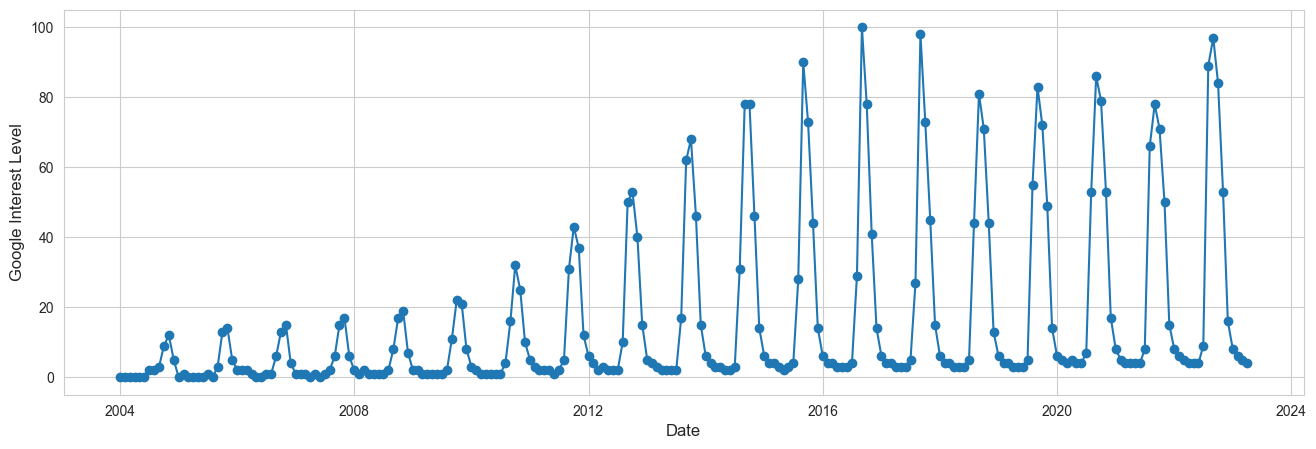

In [28]:
plt.figure(figsize=(16,5))

plt.plot(pumpkin.Month,
            pumpkin.interest_level,
            '-o')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Google Interest Level", fontsize=12)

plt.show()

This data appears to exhibit seasonality. The exact length of a season appears to be one year, or $12$ months.

##### e.

One way to explore the number of time steps in a given season is to plot scatter plots of the time series against itself at given <i>lags</i>. Such plots place the time series on the horizontal axis and the time series at $\ell$ steps into the future on the vertical axis. Seasonal data should exhibit a high correlation between itself and lags at multiples of the season length.

Make such scatter plots for lag values from $\ell=1$ to $\ell=25$. Also calculate the correlation between the time series and its lagged series for each value of $\ell$ (this is known as the <i>autocorrelation</i>). Using this information how long would you say a season is?

##### Sample Solution

In [29]:
def make_lag_plot(lag):
    x = p_train.interest_level.values[:-lag]
    y = p_train.interest_level.values[lag:]
    
    plt.figure(figsize=(5,5))
    
    plt.scatter(x, y, alpha=.7)
    plt.plot([0,100], [0,100], 'k--')
    
    plt.title("Lag = " + str(lag), fontsize=16)
    
    plt.show()
    
    return np.corrcoef(x,y)[0,1]

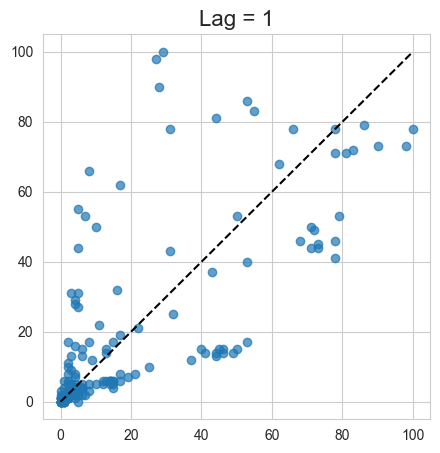

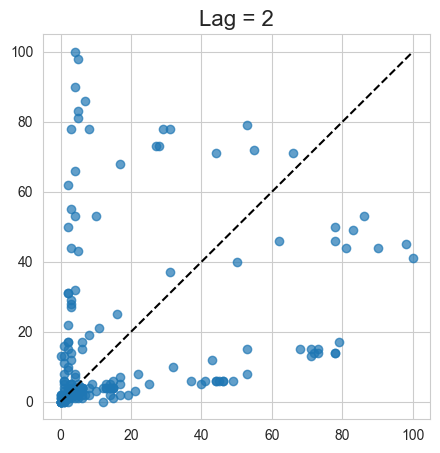

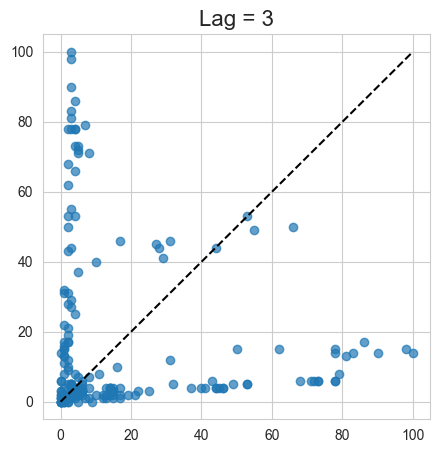

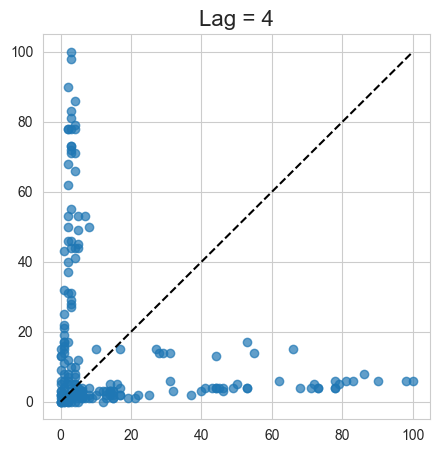

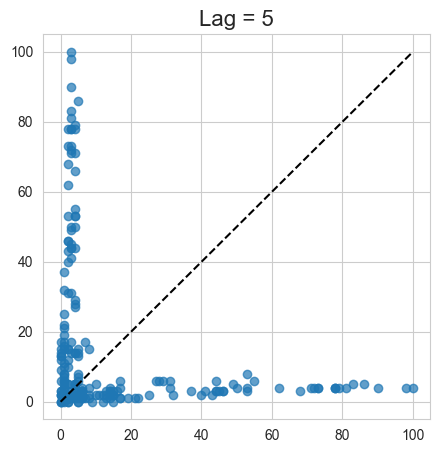

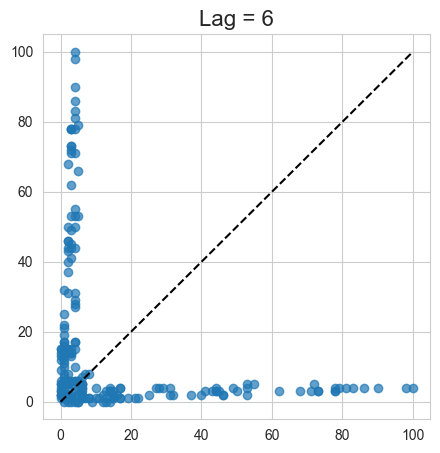

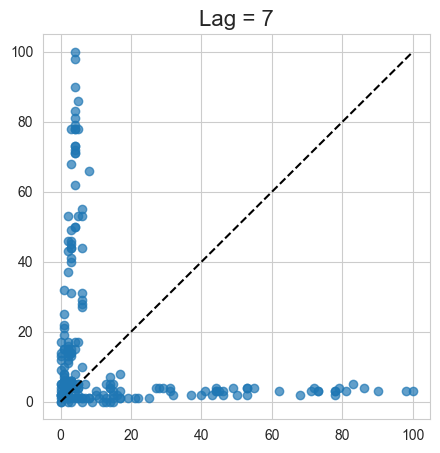

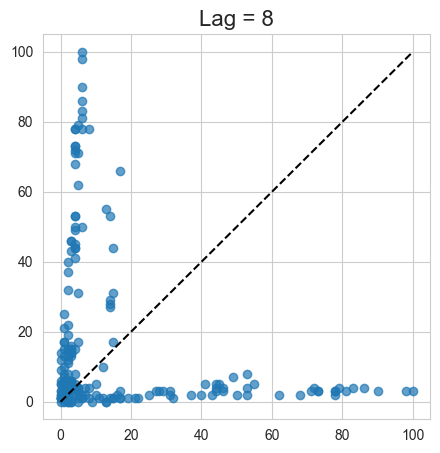

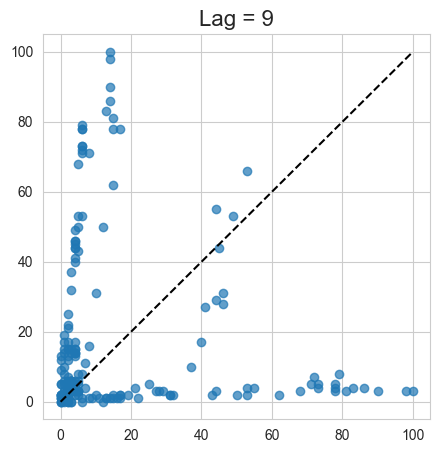

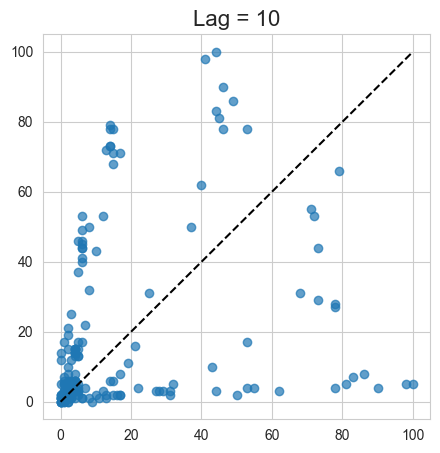

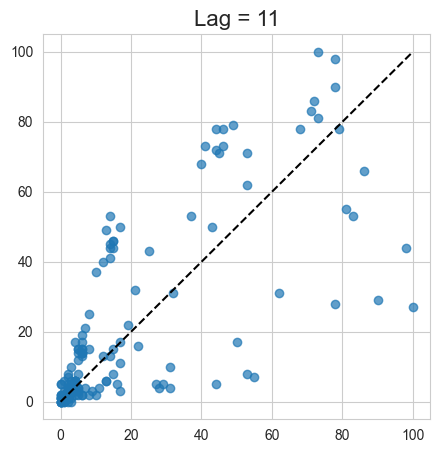

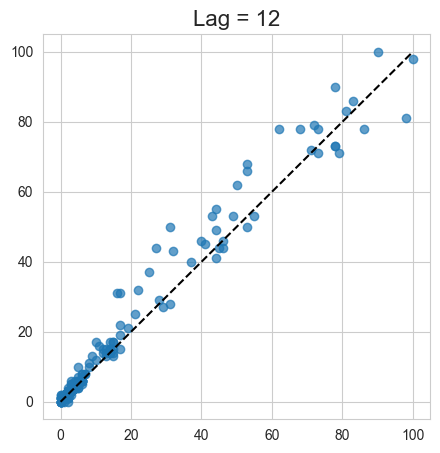

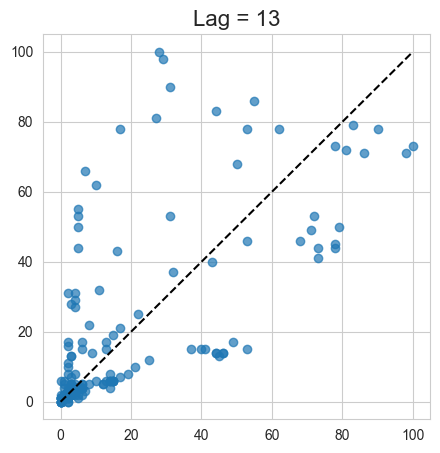

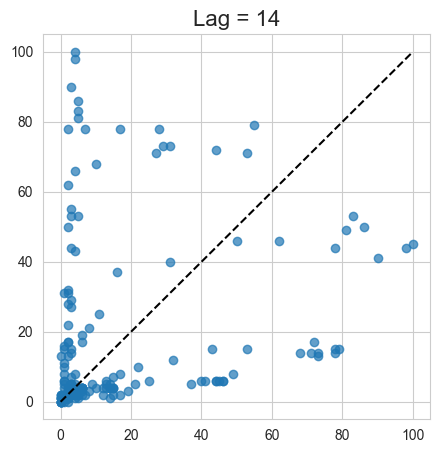

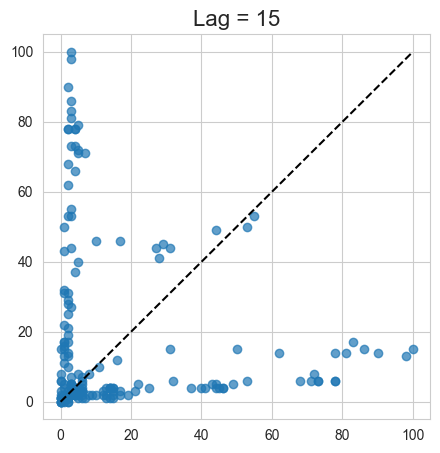

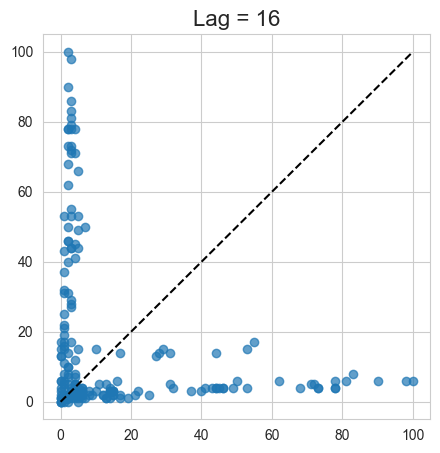

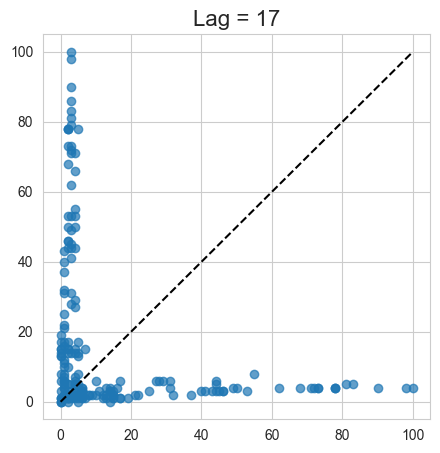

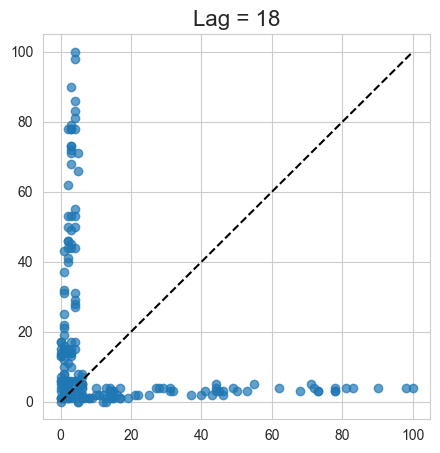

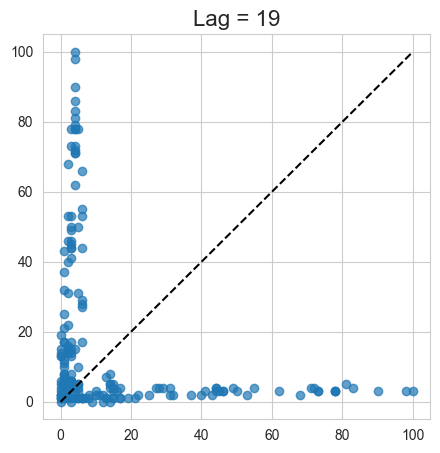

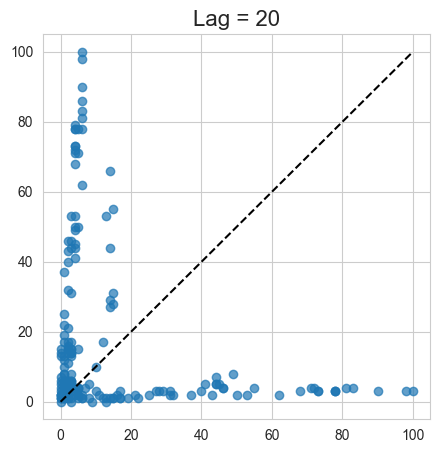

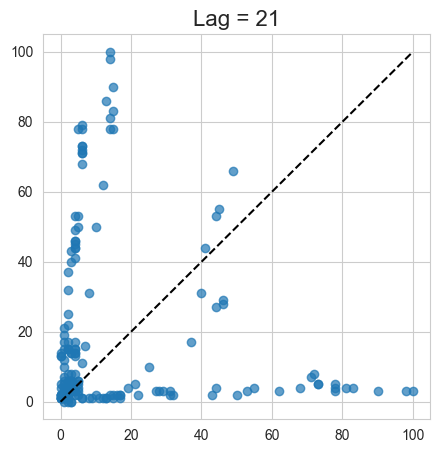

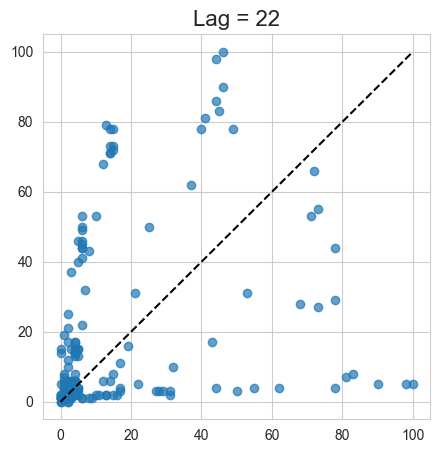

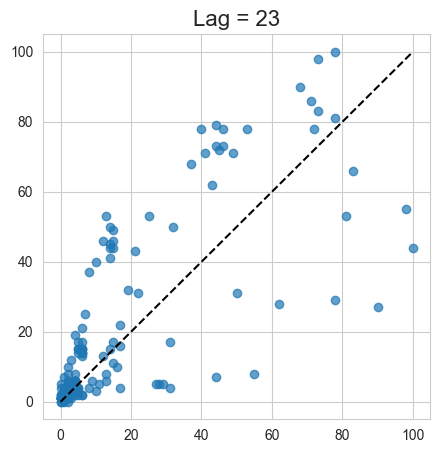

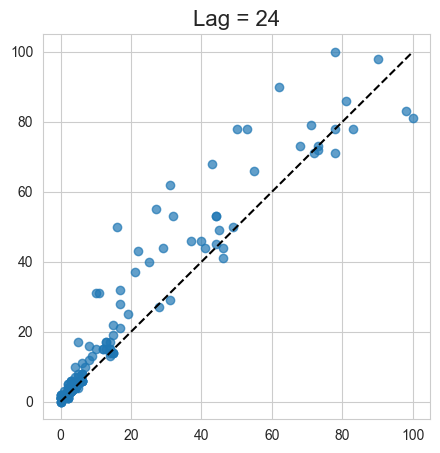

In [30]:
corr_coefs = []

for lag in range(1,25):
    corr_coefs.append(make_lag_plot(lag))

In [31]:
pd.DataFrame({'lag':range(1,25),
                 'autocorrelation':corr_coefs})

,lag,autocorrelation
0,1,0.753146
1,2,0.317100
2,3,-0.036517
3,4,-0.208585
4,5,-0.253389
5,6,-0.261054
6,7,-0.253996
7,8,-0.207931
8,9,-0.034157
9,10,0.330733


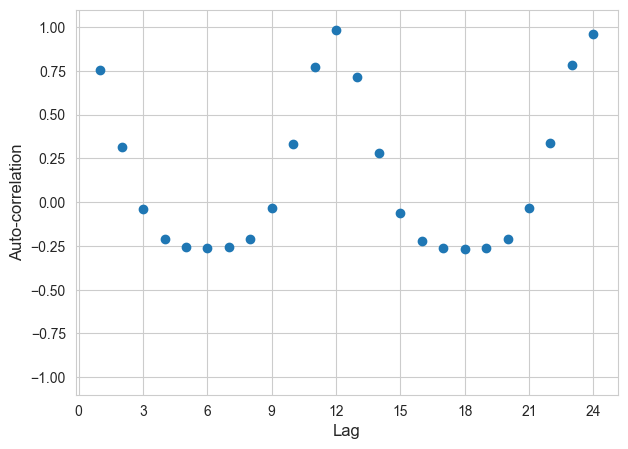

In [32]:
plt.figure(figsize=(7,5))

plt.scatter(range(1,25), corr_coefs)

plt.xlabel("Lag", fontsize=12)
plt.ylabel("Auto-correlation", fontsize=12)

plt.xticks(range(0,25,3), fontsize=10)
plt.yticks(fontsize=10)

plt.ylim([-1.1,1.1])

plt.show()

I would say that a season lasts 12 time steps, corresponding to one year.

##### f.

Select a baseline forecast for these data.

Plot the baseline forecast along with the training data.

Recall that for seasonal data we considered the following baselines in lecture:
- The seasonal average and
- The seasonal naive.

##### Sample Solution

##### Seasonal Average

In [33]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

In [34]:
p_train['year'] = p_train['Month'].apply(get_year)
p_train['month'] = p_train['Month'].apply(get_month)

p_test['year'] = p_test['Month'].apply(get_year)
p_test['month'] = p_test['Month'].apply(get_month)

In [35]:
monthly_avgs = {}

for month in range(1, 13):
    monthly_avgs[month] = p_train.loc[p_train.month == month].interest_level.mean()
    
avg_forecast = []

for month in p_test.month.values:
    avg_forecast.append(monthly_avgs[month])

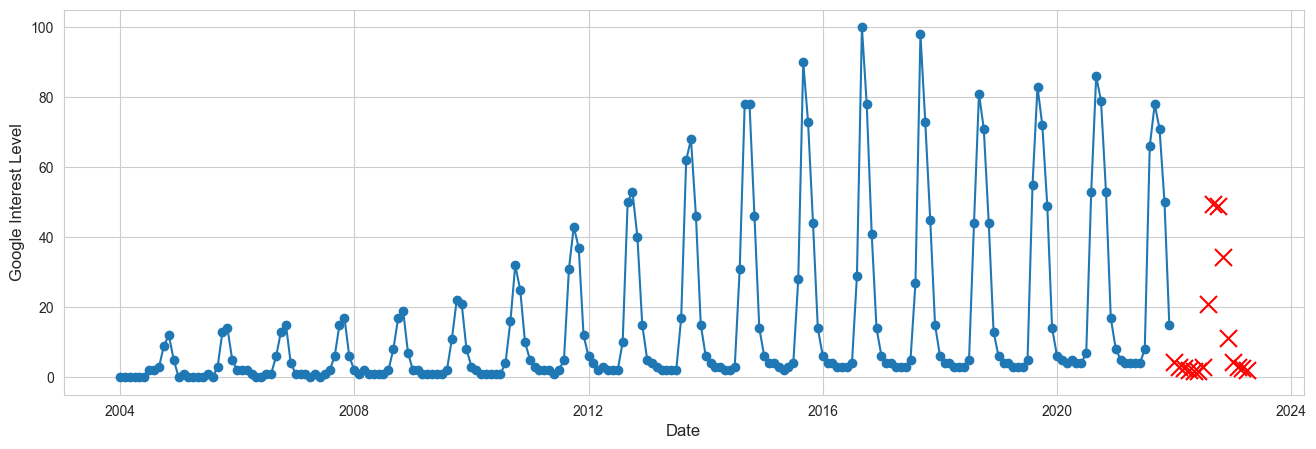

In [36]:
plt.figure(figsize=(16,5))

plt.plot(p_train.Month,
            p_train.interest_level,
            '-o',
            label='Training Data')
plt.scatter(p_test.Month,
               avg_forecast,
               color='red',
               marker='x',
               s=150,
               label='Seasonal Average Forecast')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Google Interest Level", fontsize=12)

plt.show()

##### Seasonal naive

In [37]:
naive_forecast = []

for month in p_test.month.values:
    naive_forecast.append(p_train.loc[p_train.month==month].interest_level.values[-1])

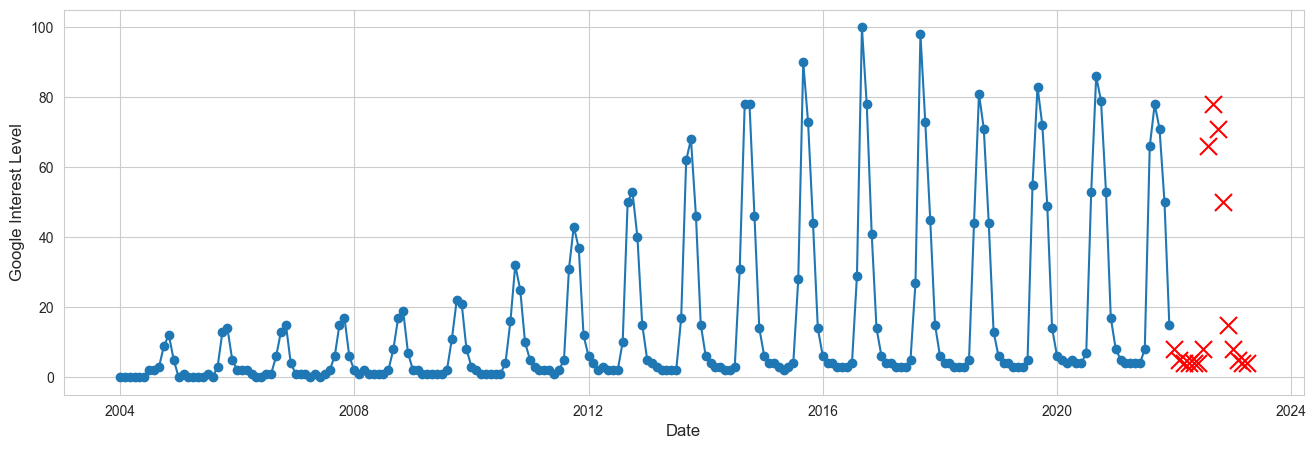

In [38]:
plt.figure(figsize=(16,5))

plt.plot(p_train.Month,
            p_train.interest_level,
            '-o',
            label='Training Data')
plt.scatter(p_test.Month,
               naive_forecast,
               color='red',
               marker='x',
               s=150,
               label='Seasonal Average Forecast')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Google Interest Level", fontsize=12)

plt.show()

##### g.

Get the average cross-validation RMSE for your baseline model. Do 5-fold cross-validation with a test set size of 12.

##### Sample Solution

In [39]:
cv = TimeSeriesSplit(5, 
                     test_size=12)

##### Seasonal average

In [40]:
avg_rmses = np.zeros(5)

i = 0

for train_index, test_index in cv.split(p_train):
    p_tt = p_train.iloc[train_index]
    p_ho = p_train.iloc[test_index]
    
    monthly_avgs = {}

    for month in range(1, 13):
        monthly_avgs[month] = p_tt.loc[p_tt.month == month].interest_level.mean()

    pred = []
    
    for month in p_ho.month.values:
        pred.append(monthly_avgs[month])
        
    avg_rmses[i] = np.sqrt(mean_squared_error(p_ho.interest_level.values, pred))
    i = i + 1

In [41]:
np.mean(avg_rmses)

19.36738883177842

##### Seasonal naive

In [42]:
naive_rmses = np.zeros(5)

i = 0

for train_index, test_index in cv.split(p_train):
    p_tt = p_train.iloc[train_index]
    p_ho = p_train.iloc[test_index]
    
    pred = []
    
    for month in p_ho.month.values:
        pred.append(p_tt.loc[p_tt.month==month].interest_level.values[-1])
        
    naive_rmses[i] = np.sqrt(mean_squared_error(p_ho.interest_level.values, pred))
    i = i + 1

In [43]:
np.mean(naive_rmses)

4.120792691126458

##### h.

Doesn't it seem like pumpkin spice shows up earlier each year? Use the training set to investigate this question. For each year in the training set find the month where the peak search interest occurs, does what you find support the implicit hypothesis of the question.

<i>Hint: the functions `get_year` and `get_month` could be useful here.</i>

In [44]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

##### Sample Solution

In [45]:
for year in p_train.year.value_counts().sort_index().index:
    i = np.argmax(p_train.loc[p_train.year==year].interest_level.values)
    
    print("Year:", 
          year, 
          ", Month of Peak Interest:", 
          p_train.loc[p_train.year==year].month.values[i])

Year: 2004 , Month of Peak Interest: 11
Year: 2005 , Month of Peak Interest: 11
Year: 2006 , Month of Peak Interest: 11
Year: 2007 , Month of Peak Interest: 11
Year: 2008 , Month of Peak Interest: 11
Year: 2009 , Month of Peak Interest: 10
Year: 2010 , Month of Peak Interest: 10
Year: 2011 , Month of Peak Interest: 10
Year: 2012 , Month of Peak Interest: 10
Year: 2013 , Month of Peak Interest: 10
Year: 2014 , Month of Peak Interest: 9
Year: 2015 , Month of Peak Interest: 9
Year: 2016 , Month of Peak Interest: 9
Year: 2017 , Month of Peak Interest: 9
Year: 2018 , Month of Peak Interest: 9
Year: 2019 , Month of Peak Interest: 9
Year: 2020 , Month of Peak Interest: 9
Year: 2021 , Month of Peak Interest: 9


Perhaps!

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)